<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment10/S10_Nagaraj_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install
#from pypi
#!pip install albumentations
#latest version directly from github before released to pypi
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-wlf08_4_
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-wlf08_4_
     |████████████████████████████████| 634kB 9.5MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=1cf5f3bbe6457a3e2a29c79148a8e8711e8b19b89d82f4a1e01123f1c4af2a52
  Stored in directory: /tmp/pip-ephem-wheel-cache-e19hylzm/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0e39fc69a779b494782788c7b10847812fc891a3610692eaf15cf2f0809a7563
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [126]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4.0/Phase1/Session10')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from models import resnet, my_model
from modules import cifar10_data_provider, my_trainer, lr_finder, nn_analysis

In [5]:
batch_size_train = 256
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test, batch_size_train)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


dog


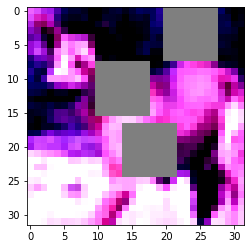

In [6]:
cifar10_data_provider.display(train_loader, classes)

In [7]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)
#model = my_model.Net().to(device)

cuda


In [0]:
import torch.nn as nn
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=1e-7,  weight_decay=1e-2)
criterion = nn.CrossEntropyLoss()

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


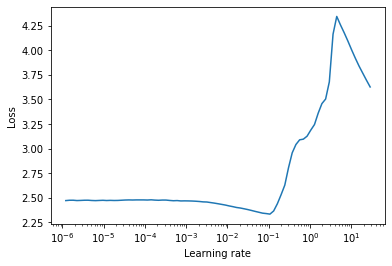

In [0]:
lrfinder = lr_finder.LRFinder(model, optimizer, criterion, device)
lrfinder.range_test(train_loader, end_lr=100, num_iter=100)
lrfinder.plot()
lrfinder.reset()

In [0]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [119]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet.ResNet18().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.9, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

EPOCHS = 50

my_trainer.run(model, device, train_loader, test_loader, optimizer, scheduler, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.002284288406372 Batch_id=195 Accuracy=28.43: 100%|██████████| 196/196 [00:58<00:00,  3.34it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 3657/10000 (36.57%)

EPOCH: 1


Loss=1.5455875396728516 Batch_id=195 Accuracy=41.59: 100%|██████████| 196/196 [00:57<00:00,  3.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 4569/10000 (45.69%)

EPOCH: 2


Loss=1.2629867792129517 Batch_id=195 Accuracy=49.24: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 5826/10000 (58.26%)

EPOCH: 3


Loss=1.190422534942627 Batch_id=195 Accuracy=55.07: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 6289/10000 (62.89%)

EPOCH: 4


Loss=1.0417531728744507 Batch_id=195 Accuracy=60.22: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0128, Accuracy: 5899/10000 (58.99%)

EPOCH: 5


Loss=0.874893069267273 Batch_id=195 Accuracy=64.42: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 7302/10000 (73.02%)

EPOCH: 6


Loss=0.936517059803009 Batch_id=195 Accuracy=67.61: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 7278/10000 (72.78%)

EPOCH: 7


Loss=0.9834567308425903 Batch_id=195 Accuracy=69.93: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 7458/10000 (74.58%)

EPOCH: 8


Loss=0.6699118614196777 Batch_id=195 Accuracy=72.17: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 7636/10000 (76.36%)

EPOCH: 9


Loss=0.587519645690918 Batch_id=195 Accuracy=73.67: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7965/10000 (79.65%)

EPOCH: 10


Loss=0.7880147695541382 Batch_id=195 Accuracy=75.42: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7745/10000 (77.45%)

EPOCH: 11


Loss=0.7851409912109375 Batch_id=195 Accuracy=76.60: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7999/10000 (79.99%)

EPOCH: 12


Loss=0.6072701811790466 Batch_id=195 Accuracy=77.69: 100%|██████████| 196/196 [00:57<00:00,  3.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8170/10000 (81.70%)

EPOCH: 13


Loss=0.9564046859741211 Batch_id=195 Accuracy=78.93: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7956/10000 (79.56%)

EPOCH: 14


Loss=0.4792041778564453 Batch_id=195 Accuracy=79.58: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8265/10000 (82.65%)

EPOCH: 15


Loss=0.5319782495498657 Batch_id=195 Accuracy=80.89: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8380/10000 (83.80%)

EPOCH: 16


Loss=0.6602373123168945 Batch_id=195 Accuracy=81.07: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8339/10000 (83.39%)

EPOCH: 17


Loss=0.34809619188308716 Batch_id=195 Accuracy=82.32: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8566/10000 (85.66%)

EPOCH: 18


Loss=0.6543915867805481 Batch_id=195 Accuracy=82.76: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8477/10000 (84.77%)

EPOCH: 19


Loss=0.42392879724502563 Batch_id=195 Accuracy=83.51: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8479/10000 (84.79%)

EPOCH: 20


Loss=0.42855215072631836 Batch_id=195 Accuracy=84.30: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8523/10000 (85.23%)

EPOCH: 21


Loss=0.37847205996513367 Batch_id=195 Accuracy=86.87: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8913/10000 (89.13%)

EPOCH: 22


Loss=0.24103288352489471 Batch_id=195 Accuracy=88.02: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8943/10000 (89.43%)

EPOCH: 23


Loss=0.33308538794517517 Batch_id=195 Accuracy=88.34: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8953/10000 (89.53%)

EPOCH: 24


Loss=0.34210342168807983 Batch_id=195 Accuracy=88.84: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8962/10000 (89.62%)

EPOCH: 25


Loss=0.28027480840682983 Batch_id=195 Accuracy=89.01: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8979/10000 (89.79%)

EPOCH: 26


Loss=0.42562994360923767 Batch_id=195 Accuracy=89.10: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8963/10000 (89.63%)

EPOCH: 27


Loss=0.2386908233165741 Batch_id=195 Accuracy=89.43: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8980/10000 (89.80%)

EPOCH: 28


Loss=0.3835762143135071 Batch_id=195 Accuracy=89.60: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8988/10000 (89.88%)

EPOCH: 29


Loss=0.2895182967185974 Batch_id=195 Accuracy=89.60: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8999/10000 (89.99%)

EPOCH: 30


Loss=0.33012640476226807 Batch_id=195 Accuracy=89.82: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9003/10000 (90.03%)

EPOCH: 31


Loss=0.24384768307209015 Batch_id=195 Accuracy=89.82: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9001/10000 (90.01%)

EPOCH: 32


Loss=0.20417454838752747 Batch_id=195 Accuracy=89.65: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8997/10000 (89.97%)

EPOCH: 33


Loss=0.2325466424226761 Batch_id=195 Accuracy=89.95: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9012/10000 (90.12%)

EPOCH: 34


Loss=0.28388911485671997 Batch_id=195 Accuracy=89.71: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9004/10000 (90.04%)

EPOCH: 35


Loss=0.4234813153743744 Batch_id=195 Accuracy=89.99: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9021/10000 (90.21%)

EPOCH: 36


Loss=0.3144882321357727 Batch_id=195 Accuracy=89.82: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9014/10000 (90.14%)

EPOCH: 37


Loss=0.28750190138816833 Batch_id=195 Accuracy=89.81: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9016/10000 (90.16%)

EPOCH: 38


Loss=0.2350795716047287 Batch_id=195 Accuracy=89.89: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9001/10000 (90.01%)

EPOCH: 39


Loss=0.15575896203517914 Batch_id=195 Accuracy=89.97: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9010/10000 (90.10%)

EPOCH: 40


Loss=0.27868127822875977 Batch_id=195 Accuracy=89.86: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9005/10000 (90.05%)

EPOCH: 41


Loss=0.2839431166648865 Batch_id=195 Accuracy=90.08: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9013/10000 (90.13%)

EPOCH: 42


Loss=0.5919989347457886 Batch_id=195 Accuracy=89.95: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9014/10000 (90.14%)

EPOCH: 43


Loss=0.2355583906173706 Batch_id=195 Accuracy=89.86: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9005/10000 (90.05%)

EPOCH: 44


Loss=0.2711115777492523 Batch_id=195 Accuracy=89.80: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9003/10000 (90.03%)

EPOCH: 45


Loss=0.2785573899745941 Batch_id=195 Accuracy=89.77: 100%|██████████| 196/196 [00:58<00:00,  3.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9001/10000 (90.01%)

EPOCH: 46


Loss=0.4452633261680603 Batch_id=195 Accuracy=89.78: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9010/10000 (90.10%)

EPOCH: 47


Loss=0.2797488570213318 Batch_id=195 Accuracy=89.62: 100%|██████████| 196/196 [00:58<00:00,  3.36it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9011/10000 (90.11%)

EPOCH: 48


Loss=0.47638851404190063 Batch_id=195 Accuracy=89.98: 100%|██████████| 196/196 [00:58<00:00,  3.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9014/10000 (90.14%)

EPOCH: 49


Loss=0.2779145836830139 Batch_id=195 Accuracy=89.83: 100%|██████████| 196/196 [00:58<00:00,  3.36it/s]



Test set: Average loss: 0.0033, Accuracy: 9002/10000 (90.02%)



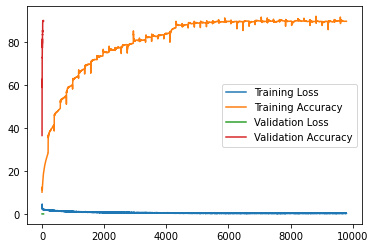

In [128]:
%matplotlib inline
from matplotlib import pyplot as plt
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)

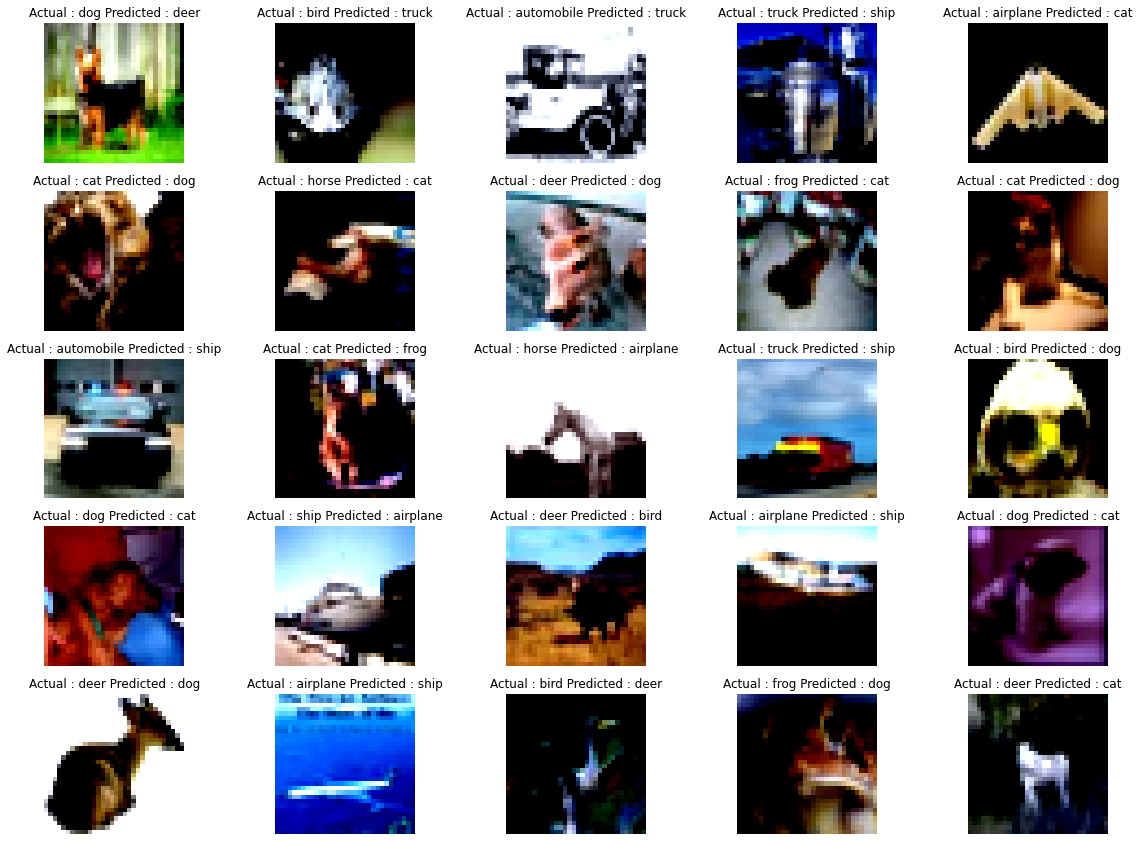

In [122]:
analyzer = nn_analysis.NN_Analysis(model, test_loader, device)
images, target_list, predicted_list = analyzer.find_misclassified(model, test_loader, device, num_imgs=25)
analyzer.plot_misclassifieds(images, target_list, predicted_list, num_imgs=25)